In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import files 
uploaded = files.upload() 


Saving covid_mental_health_train.csv to covid_mental_health_train.csv


In [ ]:
df1=pd.read_csv('covid_mental_health_test.csv')
df=pd.read_csv('covid_mental_health_train.csv')
df.head()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,past_physical,current_mental,past_mental,exercise,healthy_diet,healthy_sleep,activity,interaction_offline,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,1,65,4,2,2,1,1.0,2,1,2,2,6,3,5,6,1,5,5,4,1,1,5,2,1,6,5,0
1,591108995,4,1,68,1,2,2,2,3.0,2,2,2,2,4,4,4,4,4,6,7,4,5,4,4,4,4,4,5,0
2,613190420,2,1,68,4,2,2,2,3.0,2,2,2,2,5,2,6,4,5,7,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,1,66,4,2,2,2,5.0,2,2,2,2,5,5,6,7,4,1,6,7,1,1,7,1,1,1,1,0
4,345550215,2,1,72,4,2,2,2,10.0,2,2,2,2,7,6,5,4,6,5,6,5,2,1,1,6,1,1,4,0


In [ ]:
df.dtypes

id                          int64
city                        int64
gender                      int64
age                         int64
job                         int64
health_worker_self          int64
health_worker_family        int64
family_status               int64
income_group              float64
current_physical            int64
past_physical               int64
current_mental              int64
past_mental                 int64
exercise                    int64
healthy_diet                int64
healthy_sleep               int64
activity                    int64
interaction_offline         int64
interaction_online          int64
preventive_behaviors        int64
optimism                    int64
deterioration_economy       int64
deterioration_interact      int64
frustration                 int64
covid_anxiety               int64
covid_sleepless             int64
difficulty_living           int64
difficulty_work             int64
depression                  int64
dtype: object

## ***Data Analysis***




In [ ]:
#Data analysis

df.keys()

Index(['id', 'city', 'gender', 'age', 'job', 'health_worker_self',
       'health_worker_family', 'family_status', 'income_group',
       'current_physical', 'past_physical', 'current_mental', 'past_mental',
       'exercise', 'healthy_diet', 'healthy_sleep', 'activity',
       'interaction_offline', 'interaction_online', 'preventive_behaviors',
       'optimism', 'deterioration_economy', 'deterioration_interact',
       'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living',
       'difficulty_work', 'depression'],
      dtype='object')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            7282 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

In [ ]:
df.describe()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,past_physical,current_mental,past_mental,exercise,healthy_diet,healthy_sleep,activity,interaction_offline,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
count,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,7282.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,1.072829e+09,3.424274,1.525784,46.088269,1.649826,1.939721,1.911498,1.619628,4.308981,1.956330,1.923461,1.942857,1.879443,4.150871,4.261324,4.506039,4.016492,3.606969,3.432288,5.245412,4.046690,3.849361,2.706272,3.461208,4.031243,2.754704,3.697909,3.871893,0.180488
std,6.189227e+08,2.008436,0.499364,14.727426,1.118760,0.238016,0.284040,0.485506,2.653107,0.204372,0.265874,0.232129,0.325631,1.850211,1.663113,1.868178,1.748492,1.900107,2.040678,1.872720,1.663155,1.873872,1.766552,1.829900,1.767684,1.753610,1.888003,2.048310,0.384616
min,3.652360e+05,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.360256e+08,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000
50%,1.079098e+09,3.000000,2.000000,46.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.000000
75%,1.603533e+09,5.000000,2.000000,57.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.000000
max,2.147087e+09,7.000000,2.000000,89.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [ ]:
#df.isna().sum()

**Removing NaN / NULL vales from the data**




In [ ]:

df.shape

#Removing NaN / NULL vales from the data
df.dropna(axis = 0, inplace = True) 
print(df.shape)

(7282, 29)


# Descriptive analysis


id  mean= 1074870172.040099  median= 1082064054.0 
 mode= ModeResult(mode=array([365236]), count=array([1]))
city  mean= 3.420626201592969  median= 3.0 
 mode= ModeResult(mode=array([1]), count=array([1806]))
gender  mean= 1.486404833836858  median= 1.0 
 mode= ModeResult(mode=array([1]), count=array([3740]))
age  mean= 47.20873386432299  median= 47.0 
 mode= ModeResult(mode=array([46]), count=array([213]))
job  mean= 1.648860203240868  median= 1.0 
 mode= ModeResult(mode=array([1]), count=array([4962]))
health_worker_self  mean= 1.9436967865970887  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([6872]))
health_worker_family  mean= 1.9130733315023345  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([6649]))
family_status  mean= 1.6286734413622632  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([4578]))
income_group  mean= 4.308981049162318  median= 3.0 
 mode= ModeResult(mode=array([3.]), count=array([1684]))
current_physical  mean= 1.9522109310628

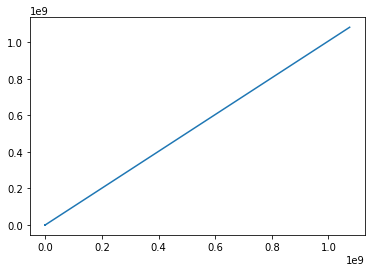

In [311]:
import scipy as sp
in_vars=list(df.keys())
mean_list=[]
median_list=[]
for var in in_vars:
  mean=sp.mean(df[var]) # mean determination
  median=sp.median(df[var]) # median determination
  mode=sp.stats.mode(df[var]) #mode determination
  print(var,' mean=', mean,' median=',median, '\n mode=', mode)
  mean_list.append(mean)
  median_list.append(median)
plt.plot(mean_list,median_list) #plotting mean vs median

In [313]:
 # pearson correlation identification between features and depression

['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
Pearsons correlation: 0.027 pvalu 0.023294414 id
id
Pearsons correlation: 0.015 pvalu 0.203734814 city
city
Pearsons correlation: 0.035 pvalu 0.002601722 gender
gender
Pearsons correlation: -0.142 pvalu 0.000000000 age
age
Pearsons correlation: -0.007 pvalu 0.541186033 job
job
Pearsons correlation: -0.026 pvalu 0.024101358 health_worker_self
health_worker_self
Pearsons correlation: -0.009 pvalu 0.430265373 health_worker_family
health_worker_family
Pearsons correlation: -0.131 pvalu 0.000000000 family_status
family_status
Pears

(array([2., 1., 4., 2., 9., 3., 0., 3., 2., 2.]),
 array([-0.2443468 , -0.19463313, -0.14491947, -0.09520581, -0.04549215,
         0.00422151,  0.05393517,  0.10364883,  0.15336249,  0.20307615,
         0.25278981]),
 <a list of 10 Patch objects>)

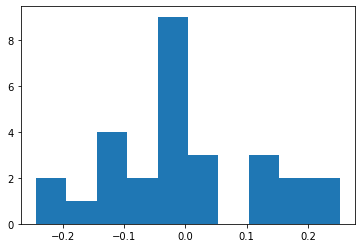

In [324]:
from scipy.stats import pearsonr
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Popoe out 'depression' column
co=[]
print(in_vars)
for var in in_vars:
  corr, p = pearsonr(df[var], df['depression']) # pearson correlation identification between features and depression
  print('Pearsons correlation: %.3f' % corr,'pvalu %.9f' % p, var) 
  co.append(corr)
  if corr<.05:
    print(var)
plt.hist(co)

In [315]:
 # spearman correlation identification between features and depression

['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
Spearman correlation: 0.027 pvalu 0.02328547354 id
Spearman correlation: 0.017 pvalu 0.14231944192 city
Spearman correlation: 0.035 pvalu 0.00260172219 gender
Spearman correlation: -0.137 pvalu 0.00000000000 age
Spearman correlation: -0.016 pvalu 0.16253592530 job
Spearman correlation: -0.026 pvalu 0.02410135816 health_worker_self
Spearman correlation: -0.009 pvalu 0.43026537349 health_worker_family
Spearman correlation: -0.131 pvalu 0.00000000000 family_status
Spearman correlation: -0.044 pvalu 0.00014551153 income_group
Spea

(array([2., 1., 5., 2., 8., 3., 0., 3., 2., 2.]),
 array([-0.2443468 , -0.19525461, -0.14616243, -0.09707024, -0.04797806,
         0.00111413,  0.05020631,  0.0992985 ,  0.14839068,  0.19748287,
         0.24657505]),
 <a list of 10 Patch objects>)

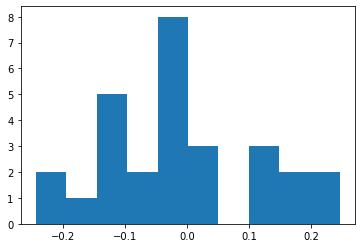

In [320]:

from scipy.stats import spearmanr
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Popoe out 'depression' column
print(in_vars)
pv=[]
co1=[]
for var in in_vars:
  corr, p = spearmanr(df[var], df['depression']) # spearman correlation identification between features and depression
  #pv.append(p)
  co1.append(corr)

  print('Spearman correlation: %.3f' % corr,'pvalu %.11f' % p, var) 
  #if corr<.05:
    #print(var)
plt.hist(co1)

In [322]:
# Independent t-test

In [323]:
from scipy.stats import ttest_ind
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Popoe out 'depression' column
print(in_vars)
for var in in_vars:
  st,pvalue= ttest_ind(df[var], df['depression']) # Independent t-test
  print('statistic=',st, var)


['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
statistic= 148.3437718428841 id
statistic= 135.17798182296366 city
statistic= 177.35462990194904 gender
statistic= 273.18701332392 age
statistic= 105.08815248319775 job
statistic= 337.28031243854025 health_worker_self
statistic= 311.57643673246463 health_worker_family
statistic= 200.8340533637749 family_status
statistic= 131.50489854423554 income_group
statistic= 345.5770486286938 current_physical
statistic= 314.18104951857833 past_physical
statistic= 335.1036842404385 current_mental
statistic= 289.4461835960495 past_mental
st

**Data Visulaization**

In [ ]:
#correlation
df.corr()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,past_physical,current_mental,past_mental,exercise,healthy_diet,healthy_sleep,activity,interaction_offline,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
id,1.000000,-0.016618,0.004887,-0.016239,0.007736,-0.019556,-0.012002,-0.021709,0.012125,0.027200,0.005296,0.009515,-0.000279,0.009486,0.002712,0.000462,0.004313,0.007798,-0.001610,-0.009878,0.006236,0.013090,0.014574,0.008977,0.007507,0.008582,0.005464,-0.020455,0.026584
city,-0.016618,1.000000,0.033771,-0.019019,0.020680,-0.027716,-0.040665,0.028606,-0.081207,-0.003401,-0.016853,0.002211,0.015732,-0.038050,-0.046908,-0.013150,-0.017502,0.022835,-0.036735,-0.016800,-0.014199,0.011199,0.001545,0.012174,0.001824,0.006600,0.004243,-0.023971,0.014896
gender,0.004887,0.033771,1.000000,-0.325932,-0.002735,-0.086504,-0.008880,-0.060142,0.035480,0.102097,0.101044,-0.003865,-0.046422,0.030051,0.118976,0.001553,0.029432,0.000238,0.119865,0.170170,0.055181,0.040214,-0.040659,0.114212,0.170918,0.036202,0.119830,0.097078,0.035283
age,-0.016239,-0.019019,-0.325932,1.000000,0.196598,0.105625,0.068150,0.318086,-0.043825,-0.153755,-0.202328,0.042873,0.091480,0.025844,0.060329,0.161474,-0.012368,-0.002627,-0.140673,-0.035952,0.015482,-0.079430,-0.035540,-0.139565,-0.094388,-0.036527,-0.101611,-0.200135,-0.141559
job,0.007736,0.020680,-0.002735,0.196598,1.000000,0.068479,0.006777,-0.056149,-0.014639,-0.078642,-0.118261,-0.061452,-0.028862,-0.006105,0.053947,0.023052,0.032339,-0.012196,-0.010629,0.014795,-0.010179,-0.046001,-0.024984,-0.045068,-0.008164,-0.013739,-0.048617,-0.124161,-0.007161
health_worker_self,-0.019556,-0.027716,-0.086504,0.105625,0.068479,1.000000,0.265092,0.016962,-0.015566,0.006721,0.018882,0.027788,0.032853,0.003770,0.015958,0.021575,0.005774,-0.008474,-0.017042,-0.006369,-0.020702,-0.009263,-0.006478,-0.038828,-0.004619,-0.005743,-0.029517,0.010585,-0.026431
health_worker_family,-0.012002,-0.040665,-0.008880,0.068150,0.006777,0.265092,1.000000,-0.031325,-0.045275,0.024563,0.039028,0.012204,0.042338,-0.007348,0.003754,0.006715,0.003388,-0.019161,-0.027109,-0.007662,-0.026558,0.004394,0.014519,-0.007866,-0.016597,-0.003992,-0.008250,-0.005597,-0.009244
family_status,-0.021709,0.028606,-0.060142,0.318086,-0.056149,0.016962,-0.031325,1.000000,0.080725,-0.013619,-0.026474,0.091267,0.091223,0.062902,0.078041,0.129068,-0.028669,0.101058,-0.009665,0.022287,0.076301,-0.068685,-0.034548,-0.007774,-0.009461,-0.017872,-0.004288,-0.061534,-0.131033
income_group,0.012125,-0.081207,0.035480,-0.043825,-0.014639,-0.015566,-0.045275,0.080725,1.000000,0.023908,0.020558,0.028627,0.037218,0.028200,0.033399,0.008433,0.033211,0.067938,0.025042,0.006461,0.035258,-0.046406,0.026720,0.012538,-0.004281,0.005065,-0.021744,0.021785,-0.014983
current_physical,0.027200,-0.003401,0.102097,-0.153755,-0.078642,0.006721,0.024563,-0.013619,0.023908,1.000000,0.362906,0.086568,0.046255,0.029907,-0.005335,-0.014896,0.015501,0.013670,0.012397,0.011493,0.014191,-0.004182,0.000617,0.015017,0.011914,-0.007055,0.005152,0.050618,-0.030315


# #Correlation matrix

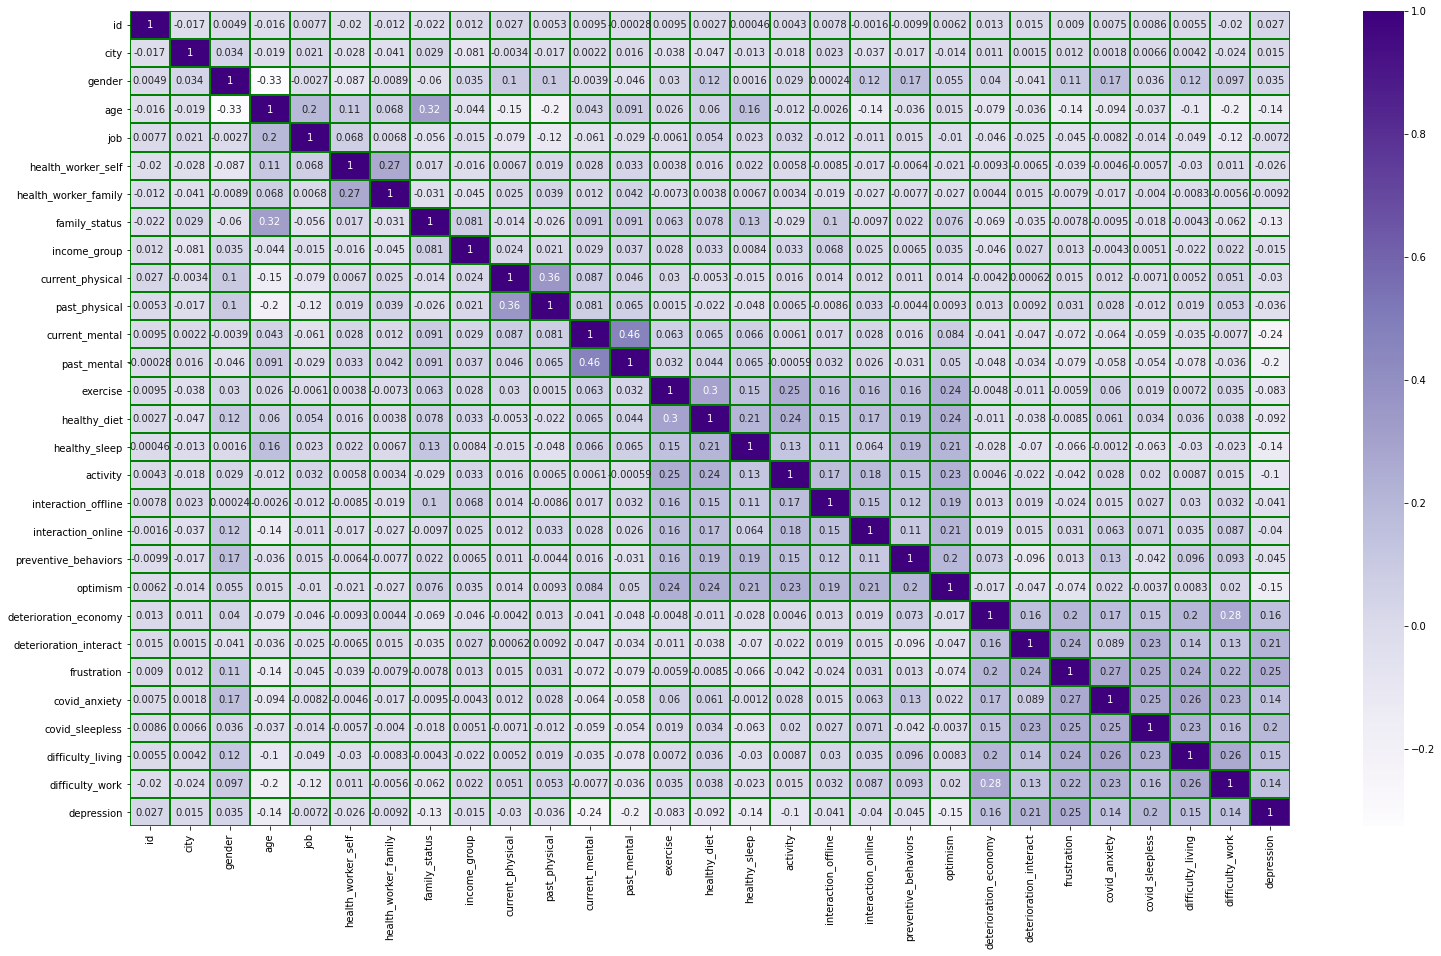

In [325]:
plt.figure(figsize = (26, 15)) 
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

In [ ]:
healthy = df[(df['depression'] ==0) ].count()[1]
depressed = df[(df['depression'] ==1) ].count()[1]
print ("num of pepole without depression: "+ str(healthy))
print ("num of pepole with chance for depression: "+ str(depressed))

num of pepole without depression: 5985
num of pepole with chance for depression: 1297


In [ ]:
##df[]

In [ ]:
## Relationship between 2 categorical variables: chi-squared test

In [ ]:
from scipy import stats
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))

In [ ]:
chi_sq_test(df, 'gender', 'depression')

contingency table between gender and depression is:

depression     0    1
gender               
1           3123  617
2           2862  680

Degree of Freedom:- 1
chi_square_statistic is 9.065109832588067 and p-value is 0.0026053288530820673. So, there is a relationship between 2 categorical variables


In [ ]:
chi_sq_test(df, 'healthy_diet', 'depression')

contingency table between healthy_diet and depression is:

depression       0    1
healthy_diet           
1              512  153
2              482  127
3              590  207
4             1282  305
5             1740  292
6              878  116
7              501   97

Degree of Freedom:- 6
chi_square_statistic is 97.60709380263867 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [257]:
chi_sq_test(df, 'past_physical', 'depression')

contingency table between past_physical and depression is:

depression        0     1
past_physical            
1               472   136
2              5513  1161

Degree of Freedom:- 1
chi_square_statistic is 9.412300385719808 and p-value is 0.002155346541189429. So, there is a relationship between 2 categorical variables


In [ ]:
chi_sq_test(df, 'city', 'depression')

contingency table between city and depression is:

depression     0    1
city                 
1           1512  294
2            976  212
3            770  188
4            690  136
5            919  221
6            566  133
7            552  113

Degree of Freedom:- 6
chi_square_statistic is 9.012625547514117 and p-value is 0.17286926313936823. So, these 2 variables are not related at all.


In [258]:
chi_sq_test(df, 'interaction_online', 'depression')

contingency table between interaction_online and depression is:

depression             0    1
interaction_online           
1                   1800  407
2                    590  129
3                    543  128
4                    920  257
5                   1037  216
6                    566   93
7                    529   67

Degree of Freedom:- 6
chi_square_statistic is 38.37127812542005 and p-value is 9.503911565511558e-07. So, there is a relationship between 2 categorical variables


In [ ]:
chi_sq_test(df, 'interaction_offline', 'depression')

In [ ]:
chi_sq_test(df, 'interaction_offline', 'depression')

contingency table between interaction_offline and depression is:

depression              0    1
interaction_offline           
1                    1191  299
2                     765  149
3                     694  167
4                    1234  295
5                    1008  207
6                     592  105
7                     501   75

Degree of Freedom:- 6
chi_square_statistic is 23.493720576433027 and p-value is 0.0006469109936296791. So, there is a relationship between 2 categorical variables


id  mean= 1074870172.040099  median= 1082064054.0 
 mode= ModeResult(mode=array([365236]), count=array([1]))
city  mean= 3.420626201592969  median= 3.0 
 mode= ModeResult(mode=array([1]), count=array([1806]))
gender  mean= 1.486404833836858  median= 1.0 
 mode= ModeResult(mode=array([1]), count=array([3740]))
age  mean= 47.20873386432299  median= 47.0 
 mode= ModeResult(mode=array([46]), count=array([213]))
job  mean= 1.648860203240868  median= 1.0 
 mode= ModeResult(mode=array([1]), count=array([4962]))
health_worker_self  mean= 1.9436967865970887  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([6872]))
health_worker_family  mean= 1.9130733315023345  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([6649]))
family_status  mean= 1.6286734413622632  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([4578]))
income_group  mean= 4.308981049162318  median= 3.0 
 mode= ModeResult(mode=array([3.]), count=array([1684]))
current_physical  mean= 1.9522109310628

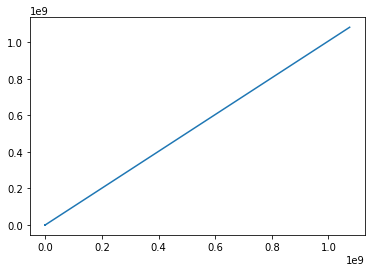

#**Linear** **Regression**

In [ ]:


#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#model_base = LinearRegression()
#data_X = df[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
#data_Y = df['depression']
#model_base.fit(data_X, data_Y)
#Prediction = model_base.predict(data_X)
#Actual = data_Y
#Prediction = model_base.predict(data_X)
#Actual = data_Y

In [ ]:
#model_base.coef_

In [ ]:
#Prediction = model_base.predict(data_X)
#Actual = data_Y

In [ ]:
#Prediction

In [ ]:
#comparison
#plt.figure(figsize=(20, 10))


#ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
#sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


#plt.title('Actual vs Fitted Values for depression')
#plt.xlabel('Depression (in decimal)')
#plt.ylabel('Proportion of target')

#plt.show()
#plt.close()

In [ ]:
#mean_squared_error(Actual, Prediction)

In [ ]:
#test_data=pd.read_csv('covid_mental_health_test.csv')

In [ ]:
#X_train=train_data.drop(columns=['target'])
#Y_train=train_data['target']

#X_test=test_data.drop(columns=['id','city'])


#**SVM**

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error, r2_score
#def trainer(data_X, data_Y):
#  model_base = LinearRegression(normalize=True)
  ##model_base = SVR(kernel='linear')
 # print(data_X.columns)
  #from sklearn.preprocessing import StandardScaler
  #scaled_features = StandardScaler().fit_transform(data_X.values)
  #model_base.fit(scaled_features, data_Y)
  #Prediction = model_base.predict(scaled_features)
  #Actual = data_Y
  
  
  #minimum=min(Prediction)
  #maximum=max(Prediction)
  #Prediction=(Prediction-minimum)/(maximum-minimum)
  #mae = mean_squared_error(Prediction, Actual)
  #return mae

**#all posible combination check**


In [ ]:

#f=list(['age','difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental'])
#l=len(f)
#best_mae, combination = 100000, 0
#for i in range(1,1<<l):
 # a=[]
  #for j in range(l):
   # if((i & (1<<j)) ):
    #  a.append(f[j])
    
  #data_X = df[a]
  #data_Y = df['depression']
  #mae = trainer(data_X, data_Y)
  #print(i,mae)
  #if mae < best_mae:
   # best_mae = mae
    #combination = i






In [ ]:
#best_mae

In [ ]:
 #a=[]
#for j in range(l):
  #if((combination & (1<<j)) ):
   # a.append(f[j])
  
#data_X = df[a]
#data_Y = df['depression']
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_features=scaler.fit_transform(data_X.values)

#model_base = LinearRegression(normalize=True)
##model_base = SVR(kernel='linear')
#print(data_X.columns)

#model_base.fit(scaled_features, data_Y)
#test_data_X=df1[a]
#scaled_test=scaler.fit_transform(test_data_X.values)
#Prediction=model_base.predict(scaled_test)
#minimum=min(Prediction)
#maximum=max(Prediction)
#Prediction=(Prediction-minimum)/(maximum-minimum)





In [ ]:
#Prediction

In [ ]:


#df1

In [ ]:
#len(df1.index)
#len(Prediction)

In [ ]:
#result=pd.DataFrame({'id':df1['id'],'depression':Prediction})

In [ ]:
#result

In [ ]:
#result.to_csv('TEAM_8_linear_regression.csv',index=False)

In [ ]:

###plot for svm
#plt.figure(figsize=(20, 10))


#ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
#sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


#plt.title('Actual vs Fitted Values for depression in SVM')
#plt.xlabel('Depression (in decimal)')
#plt.ylabel('Proportion of depression')

#plt.show()
#plt.close()


In [ ]:

#from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error, r2_score
#def trainer(data_X, data_Y):
  
  #model_base = SVR(kernel='linear')
  #print(data_X.columns)
  #from sklearn.preprocessing import StandardScaler
  #scaled_features = StandardScaler().fit_transform(data_X.values)
  #model_base.fit(scaled_features, data_Y)
  #Prediction = model_base.predict(scaled_features)
  #Actual = data_Y
  
  
  #minimum=min(Prediction)
  #maximum=max(Prediction)
  #Prediction=(Prediction-minimum)/(maximum-minimum)
  #mae = mean_squared_error(Prediction, Actual)
  #return mae

In [ ]:

#f=list(['age','difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental'])
#l=len(f)
#best_mae, combination = 100000, 0
#for i in range(1,1<<l):
 # a=[]
 # for j in range(l):
 #   if((i & (1<<j)) ):
 #     a.append(f[j])
    
 # data_X = df[a]
  #data_Y = df['target']
  #mae = trainer(data_X, data_Y)
  #print(i,mae)
 # if mae < best_mae:
 #   best_mae = mae
 #   combination = i



In [ ]:
#best_mae

In [ ]:
 #a=[]
#for j in range(l):
 # if((combination & (1<<j)) ):
  #  a.append(f[j])
  
#data_X = df[a]
#data_Y = df['target']
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_features=scaler.fit_transform(data_X.values)

#model_base = LinearRegression(normalize=True)
##model_base = SVR(kernel='linear')
#print(data_X.columns)

#model_base.fit(scaled_features, data_Y)
#test_data_X=df1[a]
#scaled_test=scaler.fit_transform(test_data_X.values)
#Prediction=model_base.predict(scaled_test)
#minimum=min(Prediction)
#maximum=max(Prediction)
#Prediction=(Prediction-minimum)/(maximum-minimum)





In [ ]:
#result=pd.DataFrame({'id':df1['id'],'depression':Prediction})

In [ ]:
#result

In [ ]:
#df1

In [274]:
X = df[['gender', 'age', 'job', 'health_worker_self','health_worker_family',  'income_group','past_physical','current_physical',  'current_mental', 'past_mental',
      'exercise', 'healthy_diet', 'healthy_sleep', 'activity','interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact','frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living',
    'difficulty_work']]
#X=df[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
y = df['depression']


#X=df[['deterioration_economy','deterioration_interact','frustration','covid_anxiety','covid_sleepless','difficulty_living','difficulty_work']]


In [277]:

Id=df1['id']

test_X = df1[[ 'gender', 'age', 'job', 'health_worker_self','health_worker_family', 'income_group','past_physical',
   'current_physical', 'current_mental', 'past_mental','exercise', 'healthy_diet', 'healthy_sleep', 'activity',
'interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact',
'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living','difficulty_work']]
#test_X=df1[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
#test_X=df1[['deterioration_economy','deterioration_interact','frustration','covid_anxiety','covid_sleepless','difficulty_living','difficulty_work']]


In [278]:
Id

0        828763412
1       2009293273
2        360753013
3        321912830
4       1090960107
           ...    
2718    1757603200
2719     262849879
2720    1521871763
2721    2053555030
2722    1914354871
Name: id, Length: 2723, dtype: int64

In [279]:
len(test_X)

2723

In [280]:
import xgboost as xg
import xgboost as xgb
# Instantiation 
#xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r = xg.XGBClassifier(objective="binary:logistic", random_state=42,eval_metric="auc")
# Fitting the model 
xgb_r.fit(X, y) 
  
# Predict the model 
pred = xgb_r.predict_proba(test_X)     
 


In [281]:
pred

array([[0.91510415, 0.08489583],
       [0.9237151 , 0.07628489],
       [0.8903455 , 0.10965448],
       ...,
       [0.88252854, 0.11747148],
       [0.9032557 , 0.09674428],
       [0.80133337, 0.19866663]], dtype=float32)

In [282]:
m=min(pred[:,1])
m


0.00548125

In [283]:

print("Accuracy of train:",xgb_r.score(X,y))


Accuracy of train: 0.8632243889041472


Here we measure the depression score 

In [284]:

result1=pd.DataFrame({'id':df1['id'],'depression':pred[:,1]})
result1


,id,depression
0,828763412,0.084896
1,2009293273,0.076285
2,360753013,0.109654
3,321912830,0.084717
4,1090960107,0.503203
...,...,...
2718,1757603200,0.620744
2719,262849879,0.634562
2720,1521871763,0.117471
2721,2053555030,0.096744


In [287]:
result1.to_csv('team8_Empire_XGBoost_binarylogistic_updated_feature1.csv',index=False)



# Performance Metrics: Log Loss

In [309]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
logloss_score = model_selection.cross_val_score(xgb_r, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (logloss_score.mean(), logloss_score.std()))

Logloss: 0.844 (0.008)


#Logistic regression for 24 features



In [293]:
test_df = pd.read_csv('covid_mental_health_test.csv')
raw_train_df = pd.read_csv('covid_mental_health_train.csv')
# using isnull() function   
raw_train_df.isnull().any()
# drop all rows with any NaN and NaT values
#raw_train_df = raw_train_df.dropna()

#fill null values with the mean of the corresponding column
raw_train_df = raw_train_df.fillna(raw_train_df.mean())
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            8610 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

In [294]:
array = raw_train_df.values
X = array[:,1:28]

y = array[:,28]

In [295]:
X.shape

(8610, 27)

In [296]:

from sklearn.feature_selection import RFE

In [297]:
# feature selection, top best 16 feature using Recursive Feature Elimination


#model = LogisticRegression(solver='lbfgs')
#rfe = RFE(model, 16)
#logistic_model = rfe.fit(X, y)
#print("Num Features: %d" % logistic_model.n_features_)
#print("Selected Features: %s" % logistic_model.support_)
#print("Feature Ranking: %s" % logistic_model.ranking_)

In [298]:
# feature selection, top best 24 feature using Recursive Feature Elimination
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 24)
logistic_model = rfe.fit(X, y)
print("Num Features: %d" % logistic_model.n_features_)
print("Selected Features: %s" % logistic_model.support_)
print("Feature Ranking: %s" % logistic_model.ranking_)

Num Features: 24
Selected Features: [ True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True]
Feature Ranking: [1 1 2 1 1 1 1 4 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1]


In [299]:
#processing test dataset and prediction on them

test_df = test_df.fillna(test_df.mean())

test_dataset = test_df.values
test_dataset = test_dataset[:,1:28]

pred_test = logistic_model.predict_proba(test_dataset)
min_test = min(pred_test[:,1])
min_test

0.002818127015654999

In [300]:
test_dataset.shape

(2723, 27)

In [301]:
print("Accuracy of train:",rfe.score(X,y))

Accuracy of train: 0.8475029036004645


In [302]:
#exporting result
result=pd.DataFrame({'id':test_df['id'],'depression':pred_test[:,1]})
result

,id,depression
0,828763412,0.092597
1,2009293273,0.040459
2,360753013,0.069202
3,321912830,0.066048
4,1090960107,0.605121
...,...,...
2718,1757603200,0.615630
2719,262849879,0.617380
2720,1521871763,0.142385
2721,2053555030,0.118520


In [306]:
result.to_csv('team8_Empire_LogisticRegression_pred_col1_feature_elimination.csv',index=False)



# Performance Metrics: Log Loss

In [307]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
logloss_score = model_selection.cross_val_score(logistic_model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (logloss_score.mean(), logloss_score.std()))

Logloss: 0.843 (0.013)
